In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

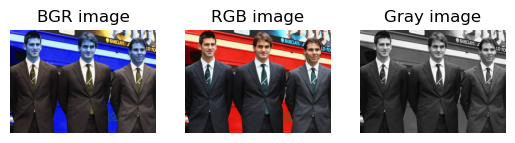

In [13]:
img_test = cv2.imread('./test_images/federer3.jpg')
plt.subplot(1,3,1), plt.imshow(img_test)
plt.title('BGR image')
plt.axis('off') 
img_rgb = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
plt.subplot(1,3,2), plt.imshow(img_rgb)
plt.title('RGB image')
plt.axis('off') 
img_gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
plt.subplot(1,3,3), plt.imshow(img_gray, cmap = 'gray')
plt.title('Gray image')
plt.axis('off') 
plt.show()

In [14]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [15]:
face = face_cascade.detectMultiScale(img_gray, 1.2, 5)
face

array([[576,  63,  86,  86],
       [ 75,  38,  88,  88],
       [333,  49,  87,  87]], dtype=int32)

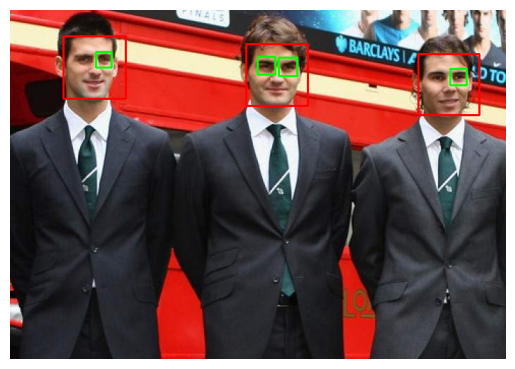

In [16]:
for (x,y,w,h) in face:
    face_img = cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_rgb = face_img[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_rgb,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(face_img, cmap='gray')
plt.axis('off')
plt.show()

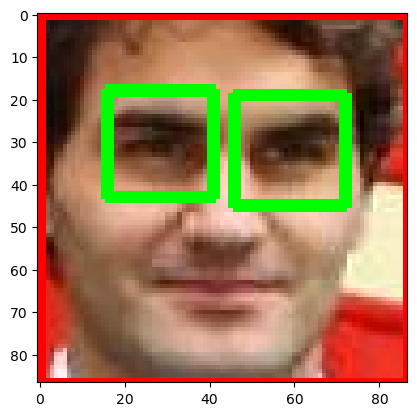

In [21]:
plt.imshow(img_rgb[49:49+87,333:333+87])